## Cleaning the data
### 1) Import

In [1]:
import pandas as pd
# Import `pyplot` and `numpy`
import matplotlib.pyplot  as plt
import matplotlib.pylab as plb
import numpy as np
import seaborn as sns
import datetime
import numexpr
import bottleneck
import feather


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.options.display.max_rows = 500
pd.options.display.max_columns = 200 
pd.set_option('display.float_format', lambda x: '%.2f' % x) #display numbers as decimals instead of scientific value

data_filepath = 'movie_metadata.csv'

In [2]:
#Import csv in a DataFrame (10 seconds)
df = pd.read_csv('movie_metadata.csv'
                       , header = 'infer'
                       , sep =","
                        , low_memory=False)
print ('CSV Imported. Shape :')
df_save = df.copy() #keep a copy of original data
df.shape #(320772, 162)

CSV Imported. Shape :


(5043, 28)

In [3]:
reorder_columns = ['movie_title', 'title_year', 'imdb_score','country', 'language', 'genres', 'plot_keywords', 'director_name','director_facebook_likes', 'actor_1_name', 'actor_2_name','actor_3_name','actor_1_facebook_likes','actor_2_facebook_likes', 'actor_3_facebook_likes', 'cast_total_facebook_likes','movie_facebook_likes', 'num_user_for_reviews', 'num_critic_for_reviews', 'num_voted_users', 'gross', 'budget', 'content_rating','color', 'duration', 'aspect_ratio', 'movie_imdb_link', 'facenumber_in_poster']
df = df[reorder_columns]
df.describe(include='all')

,movie_title,title_year,imdb_score,country,language,genres,plot_keywords,director_name,director_facebook_likes,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,num_user_for_reviews,num_critic_for_reviews,num_voted_users,gross,budget,content_rating,color,duration,aspect_ratio,movie_imdb_link,facenumber_in_poster
count,5043,4935.00,5043.00,5038,5031,5043,4890,4939,4939.00,5036,5030,5020,5036.00,5030.00,5020.00,5043.00,5043.00,5022.00,4993.00,5043.00,4159.00,4551.00,4740,5024,5028.00,4714.00,5043,5030.00
unique,4917,nan,nan,65,47,914,4760,2398,nan,2097,3032,3521,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,18,2,nan,nan,4919,nan
top,Ben-Hur,nan,nan,USA,English,Drama,based on novel,Steven Spielberg,nan,Robert De Niro,Morgan Freeman,Ben Mendelsohn,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,R,Color,nan,nan,http://www.imdb.com/title/tt3332064/?ref_=fn_t...,nan
freq,3,nan,nan,3807,4704,236,4,26,nan,49,20,8,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2118,4815,nan,nan,3,nan
mean,NaN,2002.47,6.44,NaN,NaN,NaN,NaN,NaN,686.51,NaN,NaN,NaN,6560.05,1651.75,645.01,9699.06,7525.96,272.77,140.19,83668.16,48468407.53,39752620.44,NaN,NaN,107.20,2.22,NaN,1.37
std,NaN,12.47,1.13,NaN,NaN,NaN,NaN,NaN,2813.33,NaN,NaN,NaN,15020.76,4042.44,1665.04,18163.80,19320.45,377.98,121.60,138485.26,68452990.44,206114898.45,NaN,NaN,25.20,1.39,NaN,2.01
min,NaN,1916.00,1.60,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,1.00,1.00,5.00,162.00,218.00,NaN,NaN,7.00,1.18,NaN,0.00
25%,NaN,1999.00,5.80,NaN,NaN,NaN,NaN,NaN,7.00,NaN,NaN,NaN,614.00,281.00,133.00,1411.00,0.00,65.00,50.00,8593.50,5340987.50,6000000.00,NaN,NaN,93.00,1.85,NaN,0.00
50%,NaN,2005.00,6.60,NaN,NaN,NaN,NaN,NaN,49.00,NaN,NaN,NaN,988.00,595.00,371.50,3090.00,166.00,156.00,110.00,34359.00,25517500.00,20000000.00,NaN,NaN,103.00,2.35,NaN,1.00
75%,NaN,2011.00,7.20,NaN,NaN,NaN,NaN,NaN,194.50,NaN,NaN,NaN,11000.00,918.00,636.00,13756.50,3000.00,326.00,195.00,96309.00,62309437.50,45000000.00,NaN,NaN,118.00,2.35,NaN,2.00


Remarks:
<br>num_voted_users vs num_critic_for_reviewsvs	vs num_user_for_reviews
<br>aspect_ratio 16? drop the feature
<br>genres intersting, separated by |

In [4]:
df.head(5)

,movie_title,title_year,imdb_score,country,language,genres,plot_keywords,director_name,director_facebook_likes,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,num_user_for_reviews,num_critic_for_reviews,num_voted_users,gross,budget,content_rating,color,duration,aspect_ratio,movie_imdb_link,facenumber_in_poster
0,Avatar,2009.00,7.90,USA,English,Action|Adventure|Fantasy|Sci-Fi,avatar|future|marine|native|paraplegic,James Cameron,0.00,CCH Pounder,Joel David Moore,Wes Studi,1000.00,936.00,855.00,4834,33000,3054.00,723.00,886204,760505847.00,237000000.00,PG-13,Color,178.00,1.78,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,0.00
1,Pirates of the Caribbean: At World's End,2007.00,7.10,USA,English,Action|Adventure|Fantasy,goddess|marriage ceremony|marriage proposal|pi...,Gore Verbinski,563.00,Johnny Depp,Orlando Bloom,Jack Davenport,40000.00,5000.00,1000.00,48350,0,1238.00,302.00,471220,309404152.00,300000000.00,PG-13,Color,169.00,2.35,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,0.00
2,Spectre,2015.00,6.80,UK,English,Action|Adventure|Thriller,bomb|espionage|sequel|spy|terrorist,Sam Mendes,0.00,Christoph Waltz,Rory Kinnear,Stephanie Sigman,11000.00,393.00,161.00,11700,85000,994.00,602.00,275868,200074175.00,245000000.00,PG-13,Color,148.00,2.35,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,1.00
3,The Dark Knight Rises,2012.00,8.50,USA,English,Action|Thriller,deception|imprisonment|lawlessness|police offi...,Christopher Nolan,22000.00,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000.00,23000.00,23000.00,106759,164000,2701.00,813.00,1144337,448130642.00,250000000.00,PG-13,Color,164.00,2.35,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,0.00
4,Star Wars: Episode VII - The Force Awakens ...,nan,7.10,NaN,NaN,Documentary,NaN,Doug Walker,131.00,Doug Walker,Rob Walker,NaN,131.00,12.00,nan,143,0,nan,nan,8,nan,nan,NaN,NaN,nan,nan,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,0.00


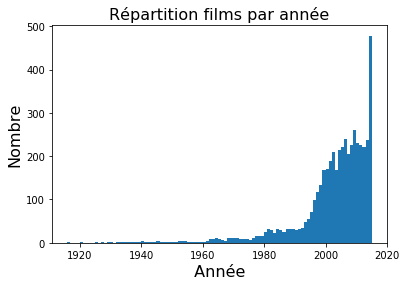

In [5]:
plt.rcParams["figure.figsize"] = (6,4)
silent = plt.hist(df['title_year'], bins = range(1916,2016))

silent = plt.title("Répartition films par année", fontsize=16)
silent = plt.xlabel(" Année ", fontsize=16)  
silent = plt.ylabel("Nombre", fontsize=16)

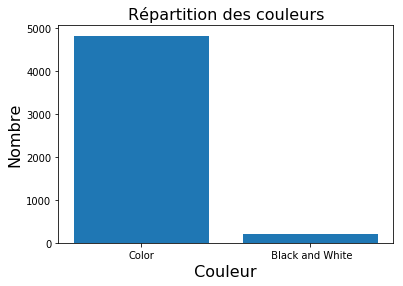

In [6]:
plt.rcParams["figure.figsize"] = (6,4)
df_count = pd.value_counts(df['color'].values, sort=True)
silent = plt.bar(df_count.index, df_count.values)

silent = plt.title("Répartition des couleurs", fontsize=16)
silent = plt.xlabel(" Couleur ", fontsize=16)  
silent = plt.ylabel("Nombre", fontsize=16)

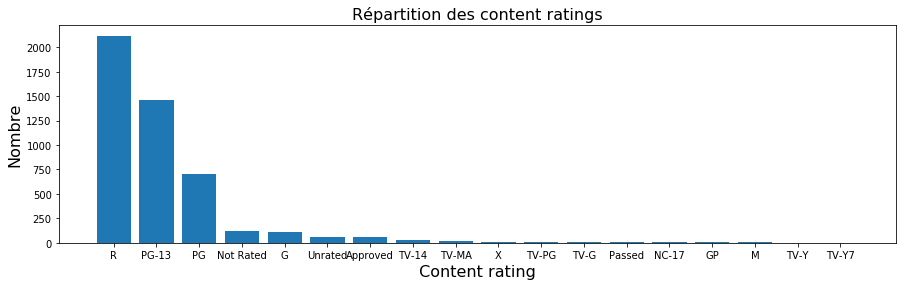

In [7]:
plt.rcParams["figure.figsize"] = (15,4)
df_count = pd.value_counts(df['content_rating'].values, sort=True)
silent = plt.bar(df_count.index, df_count.values)

silent = plt.title("Répartition des content ratings", fontsize=16)
silent = plt.xlabel(" Content rating ", fontsize=16)  
silent = plt.ylabel("Nombre", fontsize=16)

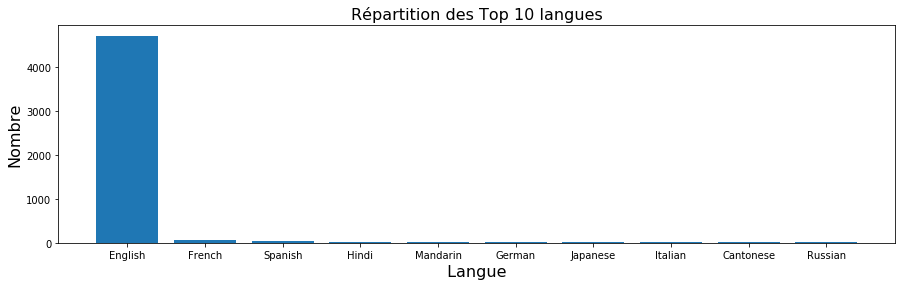

In [8]:
plt.rcParams["figure.figsize"] = (15,4)
df_count = pd.value_counts(df['language'].values, sort=True)
df_count = df_count.head(10)
silent = plt.bar(df_count.index, df_count.values)

silent = plt.title("Répartition des Top 10 langues", fontsize=16)
silent = plt.xlabel(" Langue ", fontsize=16)  
silent = plt.ylabel("Nombre", fontsize=16)

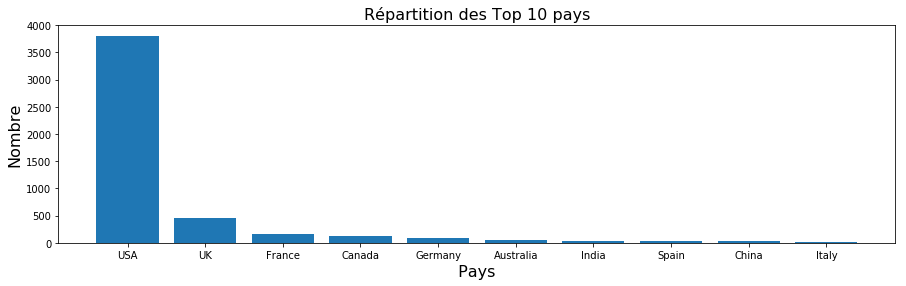

In [9]:
plt.rcParams["figure.figsize"] = (15,4)
df_count = pd.value_counts(df['country'].values, sort=True)
df_count = df_count.head(10)
silent = plt.bar(df_count.index, df_count.values)

silent = plt.title("Répartition des Top 10 pays", fontsize=16)
silent = plt.xlabel(" Pays ", fontsize=16)  
silent = plt.ylabel("Nombre", fontsize=16)

### 2) Drop unused columns

26 different genres


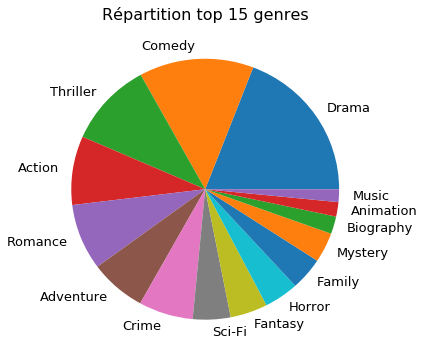

In [10]:
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams["font.size"] = (13)
df_genres = df['genres'].str.split(pat='|', n=-1, expand=True)
df_genres = df_genres.values.flatten()
df_genres = df_genres[df_genres!=np.array(None)]

unique, counts = np.unique(df_genres, return_counts=True)
np_genres = np.column_stack((unique,counts))
np_genres = np_genres[np_genres[:, 1].argsort()[::-1]]
print(np_genres.shape[0], 'different genres')
silent =  plt.pie(np_genres[0:15,1], None, np_genres[0:15,0])
silent = plt.title("Répartition top 15 genres", fontsize=16)


8087 different plot


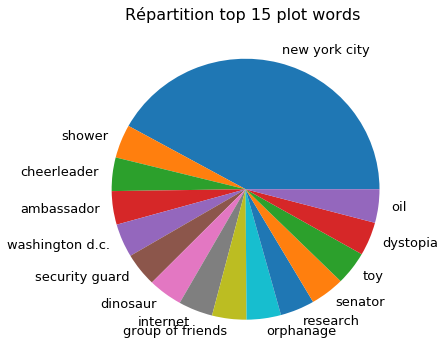

In [11]:
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams["font.size"] = (13)
df_plot = df['plot_keywords'].str.split(pat='|', n=-1, expand=True)
df_plot = df_plot.values.flatten()
df_plot = df_plot[df_plot!=np.array(None)]

unique, counts = np.unique(df_plot.astype(str), return_counts=True)
np__plot = np.column_stack((unique,counts))

np__plot = np__plot[np__plot[:, 1].argsort()[::-1]]

print(np__plot.shape[0], 'different plot')
silent =  plt.pie(np__plot[0:15,1], None, np__plot[0:15,0])
silent = plt.title("Répartition top 15 plot words ", fontsize=16)

In [12]:
df = df.drop(['movie_imdb_link', 'facenumber_in_poster'], axis = 1)

### 3) Fix values

3a) Null/Nan values

In [13]:
def count_nan(feature_name):
    print(df[feature_name].isna().sum(),'null/nan values for:',feature_name)
def fill_feature_with_mean(feature_name) :
    count_nan(feature_name)
    print('Filling null',feature_name,'with mean:',round(df[feature_name].mean(),2))
    df[feature_name] = df[feature_name].fillna(round(df[feature_name].mean(),2))
def fill_feature_with_empty(feature_name) :
    count_nan(feature_name)
    if df.dtypes[feature_name] in ['int64','float64']:
        print('Filling null',feature_name,'with zeros')
        df[feature_name] = df[feature_name].fillna(0)
    elif df.dtypes[feature_name] in ['object']:
        print('Filling null',feature_name,'with empty string')
        df[feature_name] = df[feature_name].fillna('')
    else :
        print('error, unmanaged pandas dtype')
def fill_feature_with_value(feature_name, value) :
    count_nan(feature_name)
    print('Filling null',feature_name,'with mean:',value)
    df[feature_name] = df[feature_name].fillna(value)

In [14]:
fill_feature_with_mean('aspect_ratio')
fill_feature_with_mean('title_year')
fill_feature_with_mean('budget')
fill_feature_with_mean('duration')
fill_feature_with_mean('gross')

329 null/nan values for: aspect_ratio
Filling null aspect_ratio with mean: 2.22
108 null/nan values for: title_year
Filling null title_year with mean: 2002.47
492 null/nan values for: budget
Filling null budget with mean: 39752620.44
15 null/nan values for: duration
Filling null duration with mean: 107.2
884 null/nan values for: gross
Filling null gross with mean: 48468407.53


In [15]:
features_to_fill_with_empty = [
'director_name'
,'director_facebook_likes'
,'num_critic_for_reviews'
,'director_facebook_likes'
,'actor_3_facebook_likes'
,'actor_2_name'
,'actor_1_facebook_likes'
,'actor_1_name'
,'actor_3_name'
,'plot_keywords'
,'num_user_for_reviews'
,'language'
,'country'
,'actor_2_facebook_likes']

for feature in features_to_fill_with_empty:
    fill_feature_with_empty(feature)

104 null/nan values for: director_name
Filling null director_name with empty string
104 null/nan values for: director_facebook_likes
Filling null director_facebook_likes with zeros
50 null/nan values for: num_critic_for_reviews
Filling null num_critic_for_reviews with zeros
0 null/nan values for: director_facebook_likes
Filling null director_facebook_likes with zeros
23 null/nan values for: actor_3_facebook_likes
Filling null actor_3_facebook_likes with zeros
13 null/nan values for: actor_2_name
Filling null actor_2_name with empty string
7 null/nan values for: actor_1_facebook_likes
Filling null actor_1_facebook_likes with zeros
7 null/nan values for: actor_1_name
Filling null actor_1_name with empty string
23 null/nan values for: actor_3_name
Filling null actor_3_name with empty string
153 null/nan values for: plot_keywords
Filling null plot_keywords with empty string
21 null/nan values for: num_user_for_reviews
Filling null num_user_for_reviews with zeros
12 null/nan values for: lan

In [16]:
fill_feature_with_value('color', 'Color')
fill_feature_with_value('content_rating', 'R')

19 null/nan values for: color
Filling null color with mean: Color
303 null/nan values for: content_rating
Filling null content_rating with mean: R


### 3b) Anomalies

Unrealistic aspect ratios  == 16

In [17]:
df[df['aspect_ratio'] ==16].sample(2)
df.loc[df['aspect_ratio'] ==16, 'aspect_ratio'] = 2.22

,movie_title,title_year,imdb_score,country,language,genres,plot_keywords,director_name,director_facebook_likes,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,num_user_for_reviews,num_critic_for_reviews,num_voted_users,gross,budget,content_rating,color,duration,aspect_ratio
1710,Trapped,2002.47,8.20,Iceland,Icelandic,Crime|Drama|Thriller,coastal town|iceland|police|snowstorm|winter s...,,0.00,Ólafur Darri Ólafsson,Ingvar Eggert Sigurðsson,Björn Hlynur Haraldsson,147.00,63.00,51.00,307,0,19.00,16.00,2308,48468407.53,39752620.44,R,Color,511.00,16.00
1659,The Family,2002.47,7.50,USA,English,Drama|Mystery,family drama|lie|missing child|political campa...,,0.00,Zach Gilford,Joan Allen,Liam James,971.00,805.00,468.00,3295,0,30.00,9.00,3322,48468407.53,39752620.44,TV-PG,Color,60.00,16.00


##### Budget sometime too high. 
"Pirates of the Caribbean: At World's End "
is supposed to be the most expensive movie ever made at 300M

In [18]:
df.loc[df['budget'] > 300000000,:].sample(2)
#Pirates of the Caribbean: At World's End 
df.loc[df['budget'] > 300000000, 'budget'] = 39752620 #mean budget



,movie_title,title_year,imdb_score,country,language,genres,plot_keywords,director_name,director_facebook_likes,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,num_user_for_reviews,num_critic_for_reviews,num_voted_users,gross,budget,content_rating,color,duration,aspect_ratio
3859,Lady Vengeance,2005.00,7.70,South Korea,Korean,Crime|Drama,cake|christian|lesbian sex|oral sex|pregnant s...,Chan-wook Park,0.00,Min-sik Choi,Yeong-ae Lee,Hye-jeong Kang,717.00,126.00,38.00,907,4000,131.00,202.00,53508,211667.00,4200000000.00,R,Color,112.00,2.35
1016,The Messenger: The Story of Joan of Arc,1999.00,6.40,France,English,Adventure|Biography|Drama|History|War,cathedral|dauphin|france|trial|wartime rape,Luc Besson,0.00,Paul Brooke,David Bailie,Rab Affleck,51.00,40.00,15.00,144,0,390.00,111.00,55889,14131298.00,390000000.00,R,Color,158.00,2.35


Gross max value is Avatar, which is correct

##### Do Facebook likes always match the actor and directors ?
actually no, there are few cases

In [19]:
def unify(df_, col_unique, col_value):
    df = df_.copy()
    g = df.groupby([col_unique, col_value], observed =True).size().groupby(col_unique) #.size()
    df_most_common = pd.DataFrame(g.filter(lambda x: len(x) > 1)).reset_index().sort_values(0).drop_duplicates(col_unique, keep='last')

    for index, row in df_most_common.iterrows():
        df[    (df[col_unique] == row[col_unique])   ].loc[:, col_value]  = row[col_value]
        
    return df

df = unify(df, 'director_name', 'director_facebook_likes')
df = unify(df, 'actor_1_name', 'actor_1_facebook_likes')
df = unify(df, 'actor_2_name', 'actor_2_facebook_likes')
df = unify(df, 'actor_3_name', 'actor_3_facebook_likes')


C:\Users\Maly-Fenix\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Tried to fix it but my code doesn't work.
<br> Given the low number and small differences in values, i'll ignore it.


In [20]:
df.describe(include='all')

,movie_title,title_year,imdb_score,country,language,genres,plot_keywords,director_name,director_facebook_likes,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,num_user_for_reviews,num_critic_for_reviews,num_voted_users,gross,budget,content_rating,color,duration,aspect_ratio
count,5043,5043.00,5043.00,5043,5043,5043,5043,5043,5043.00,5043,5043,5043,5043.00,5043.00,5043.00,5043.00,5043.00,5043.00,5043.00,5043.00,5043.00,5043.00,5043,5043,5043.00,5043.00
unique,4917,nan,nan,66,48,914,4761,2399,nan,2098,3033,3522,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,18,2,nan,nan
top,Ben-Hur,nan,nan,USA,English,Drama,,,nan,Robert De Niro,Morgan Freeman,,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,R,Color,nan,nan
freq,3,nan,nan,3807,4704,236,153,104,nan,49,20,23,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2421,4834,nan,nan
mean,NaN,2002.47,6.44,NaN,NaN,NaN,NaN,NaN,672.35,NaN,NaN,NaN,6550.94,1647.50,642.07,9699.06,7525.96,271.63,138.80,83668.16,48468407.53,34127026.97,NaN,NaN,107.20,2.10
std,NaN,12.34,1.13,NaN,NaN,NaN,NaN,NaN,2785.87,NaN,NaN,NaN,15012.32,4038.09,1661.81,18163.80,19320.45,377.60,121.79,138485.26,62163183.48,39463776.13,NaN,NaN,25.16,0.29
min,NaN,1916.00,1.60,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,162.00,218.00,NaN,NaN,7.00,1.18
25%,NaN,1999.00,5.80,NaN,NaN,NaN,NaN,NaN,6.00,NaN,NaN,NaN,611.00,278.50,130.00,1411.00,0.00,64.00,48.00,8593.50,8460992.50,7000000.00,NaN,NaN,93.00,1.85
50%,NaN,2005.00,6.60,NaN,NaN,NaN,NaN,NaN,45.00,NaN,NaN,NaN,986.00,595.00,367.00,3090.00,166.00,155.00,109.00,34359.00,37432299.00,23000000.00,NaN,NaN,103.00,2.22
75%,NaN,2011.00,7.20,NaN,NaN,NaN,NaN,NaN,189.00,NaN,NaN,NaN,11000.00,918.00,635.00,13756.50,3000.00,324.00,194.00,96309.00,51357065.50,40000000.00,NaN,NaN,118.00,2.35


Note : All Min and Max values seem fine !

### 4) Drop rows 

Check potential duplicates

In [21]:
df_no_duplicates = df.drop_duplicates()
print((df.shape[0] - df_no_duplicates.shape[0]) ,"perfect duplicates deleted" )
df = df_no_duplicates

45 perfect duplicates deleted


In [22]:
#other duplicates
groupby = df.groupby(['movie_title', 'title_year'])
duplicates = groupby.filter(lambda x: len(x) > 1)
duplicates.sort_values(by=['movie_title']).head(10)

,movie_title,title_year,imdb_score,country,language,genres,plot_keywords,director_name,director_facebook_likes,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,num_user_for_reviews,num_critic_for_reviews,num_voted_users,gross,budget,content_rating,color,duration,aspect_ratio
4894,"20,000 Leagues Under the Sea",1954.00,7.20,USA,English,Adventure|Drama|Family|Fantasy|Sci-Fi,captain|expedition|sea|submarine|whale,Richard Fleischer,130.00,James Mason,Robert J. Wilke,Paul Lukas,618.00,53.00,51.00,800,0,108.00,69.00,22124,48468407.53,5000000.00,Approved,Color,127.00,1.37
3711,"20,000 Leagues Under the Sea",1954.00,7.20,USA,English,Adventure|Drama|Family|Fantasy|Sci-Fi,captain|expedition|sea|submarine|whale,Richard Fleischer,130.00,James Mason,Robert J. Wilke,Paul Lukas,617.00,53.00,51.00,799,0,108.00,69.00,22123,48468407.53,5000000.00,Approved,Color,127.00,1.37
1420,A Nightmare on Elm Street,1984.00,7.50,USA,English,Horror,freddy krueger|lucid dream|serial killer|slash...,Wes Craven,0.00,Johnny Depp,Lin Shaye,Amanda Wyss,40000.00,852.00,574.00,42918,10000,668.00,256.00,149285,26505000.00,1800000.00,X,Color,101.00,1.85
4352,A Nightmare on Elm Street,1984.00,7.50,USA,English,Horror,freddy krueger|lucid dream|serial killer|slash...,Wes Craven,0.00,Johnny Depp,Lin Shaye,Amanda Wyss,40000.00,852.00,574.00,42918,10000,668.00,256.00,149293,26505000.00,1800000.00,X,Color,101.00,1.85
4842,Across the Universe,2007.00,7.40,USA,English,Drama|Fantasy|Musical|Romance,anti war|liverpool|love|protest|song,Julie Taymor,278.00,Jim Sturgess,T.V. Carpio,Robert Clohessy,5000.00,117.00,107.00,5405,14000,524.00,156.00,91863,24343673.00,45000000.00,PG-13,Color,133.00,2.35
1113,Across the Universe,2007.00,7.40,USA,English,Drama|Fantasy|Musical|Romance,anti war|liverpool|love|protest|song,Julie Taymor,278.00,Jim Sturgess,T.V. Carpio,Robert Clohessy,5000.00,117.00,107.00,5405,14000,524.00,156.00,91860,24343673.00,45000000.00,PG-13,Color,133.00,2.35
33,Alice in Wonderland,2010.00,6.50,USA,English,Adventure|Family|Fantasy,alice in wonderland|mistaking reality for drea...,Tim Burton,13000.00,Johnny Depp,Alan Rickman,Anne Hathaway,40000.00,25000.00,11000.00,79957,24000,736.00,451.00,306320,334185206.00,200000000.00,PG,Color,108.00,1.85
4128,Alice in Wonderland,2010.00,6.50,USA,English,Adventure|Family|Fantasy,alice in wonderland|mistaking reality for drea...,Tim Burton,13000.00,Johnny Depp,Alan Rickman,Anne Hathaway,40000.00,25000.00,11000.00,79957,24000,736.00,451.00,306336,334185206.00,200000000.00,PG,Color,108.00,1.85
2639,Aloha,2015.00,5.40,USA,English,Comedy|Drama|Romance,box office flop|critically bashed|hawaii|one w...,Cameron Crowe,488.00,Emma Stone,Bradley Cooper,Bill Murray,15000.00,14000.00,13000.00,44037,11000,172.00,138.00,39782,20991497.00,37000000.00,PG-13,Color,105.00,1.85
1389,Aloha,2015.00,5.40,USA,English,Comedy|Drama|Romance,box office flop|critically bashed|hawaii|one w...,Cameron Crowe,488.00,Emma Stone,Bradley Cooper,Bill Murray,15000.00,14000.00,13000.00,44037,11000,172.00,138.00,39778,20991497.00,37000000.00,PG-13,Color,105.00,1.85


Trim titles spaces
Note : might want to do this to other columns?

In [23]:
df.loc[:,'movie_title']=df['movie_title'].str.strip()

Pretty similar duplicates appart from num_voted_users
will be deleted too

In [24]:

df_no_duplicates = df.sort_values('movie_facebook_likes').drop_duplicates(['movie_title'], keep='last').copy()
print('Dropping',df.shape[0]-df_no_duplicates.shape[0],'duplicates by name')
df = df_no_duplicates.copy()
print(df.shape[0],'movies remaining')

Dropping 82 duplicates by name
4916 movies remaining


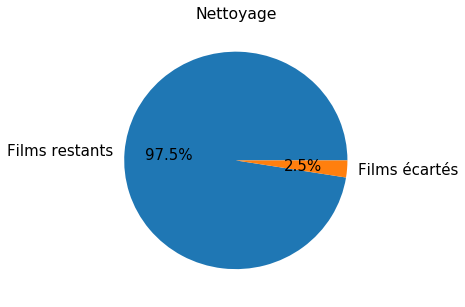

In [25]:
df_plt_results = pd.DataFrame({'movies_count': [df.shape[0], df_save.shape[0]-df.shape[0]]},
                  index=['Films restants', 'Films écartés'])
plot = df_plt_results.plot.pie(y='movies_count'
                               , figsize=(5, 5)
                               , autopct='%1.1f%%'
                                , title = 'Nettoyage'
                               , fontsize=15 
                               , legend = False)
plot = plt.ylabel('')


# Export

In [26]:
feather.write_dataframe(df, 'movie_metadata_cleaned_v1.feather')